In [263]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [264]:
def get_data():
    data=load_svmlight_file('./Desktop/australian_scale')
    return data[0].todense(),data[1]
X,y=get_data()
y=np.reshape(y,(len(y),1))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [265]:
(n,m) = np.shape(X_train)
X_train = np.hstack((X_train, np.ones((n, 1))))
(n,m) = np.shape(X_test)
X_test = np.hstack((X_test, np.ones((n, 1))))
theta = np.ones((m + 1, 1))

In [266]:
loss_train = []
loss_test = []
error_train = []
error_test = []
learning_rate = 0.01

In [267]:
def error_rate(y_cal, y_lab):
    total = len(y_cal)
    error_num = 0
    for i in range(total):
        if y_cal[i] != y_lab[i]:
            error_num += 1
    return error_num / total

In [268]:
def gradient(X, y, theta, learning_rate):
    sum = np.zeros((len(theta), 1))
    sum.dtype = 'float64'
    for i in range(len(y)):
        val = 1 - y[i] * (X[i] * theta)
        if val >= 0:
            sum = sum + (-y[i] * X[i]).T
    sum = sum * 100
    return theta + sum

In [269]:
def hinge_loss(X, y, theta):
    l = 1 - np.multiply(y, X * theta)
    l2 = ( l >= 0 )
    result = np.multiply(l,l2)
    
    return np.sum(result)

In [270]:
def get_y_cal(X, theta):
    y = np.ones((np.shape(X)[0],1))
    val = X * theta
    for i in range(len(y)):
        y[i] = (1 if val[i] > 0 else -1)
    return y

In [271]:
for i in range(100):
    grad = gradient(X_train, y_train, theta, learning_rate)
    theta = theta - learning_rate * (grad)
    
    error_train.append(error_rate(get_y_cal(X_train, theta), y_train))
    error_test.append(error_rate(get_y_cal(X_test, theta), y_test))
    
    loss_train.append(hinge_loss(X_train, y_train, theta))
    loss_test.append(hinge_loss(X_test, y_test, theta))
    
# print(error_train)
# print(error_test)

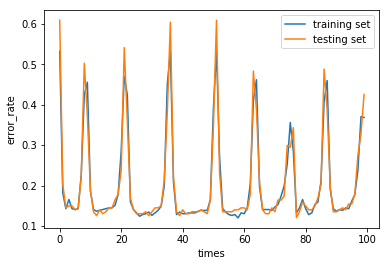

In [272]:
plt.xlabel('times')
plt.ylabel('error_rate')
plt.plot(range(len(error_train)), error_train, label='training set')
plt.plot(range(len(error_test)), error_test, label='testing set')
plt.legend()
plt.show()

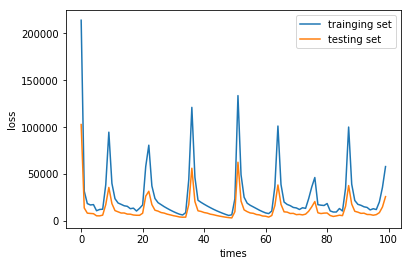

In [273]:
plt.xlabel('times')
plt.ylabel("loss")
plt.plot(range(len(loss_train)),loss_train,label="trainging set")
plt.plot(range(len(loss_test)),loss_test,label="testing set")

plt.legend()
plt.show()